# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

###Description
Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

###Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

 1. Do the users spend more time on the new landing page than on the existing landing page?

 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
 3. Does the converted status depend on the preferred language?
 4. Is the time spent on the new page the same for the different language users?
 

###Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

 1. user_id - Unique user ID of the person visiting the website
 2. group - Whether the user belongs to the first group . (control) or the second group (treatment)
 3. landing_page - Whether the landing page is new or old
 4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
 5. converted - Whether the user gets converted to a subscriber of the news portal or not
 6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import ploty
import plotly.express as px

#import statistical libaries
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
ds = pd.read_csv('/content/drive/MyDrive/Python Project/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# view the first 5 rows
ds.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# view the last 5 rows
ds.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Observations:
The DataFrame has 6 columns as mentioned in the Data Dictionary.

In [ ]:
#check the shape of the dataframe
ds.shape

(100, 6)

In [ ]:
print('The dataframe has', ds.shape[0], 'rows and', ds.shape[1],'columns.')

The dataframe has 100 rows and 6 columns.


In [ ]:
# Use info() to print a concise summary of the DataFrame
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observation
* The dataframe has 6 columns namely:user_id,group,landing_page,time_spent_on_the_page,
converted,language_preferred.

* 4 columns namely: group,landing_page,converted,language_preferred are categorical columns.

* 2 columns namely: time_spent_on_the_page,user_id are numerical columns.


In [ ]:
# missing value check
ds.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
#Checking for duplicates
ds.duplicated(subset=None, keep='first')

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [ ]:
ds.shape

(100, 6)

### Observation:
* There are no missing values in the dataframe 
* The dataframe was checked for duplicate values and there were no duplicate values.

In [ ]:
# statistical summary of data
ds.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
#calculate total time and mean(average) time spent on the old and new pages
# first calculate total time and mean(average) time spent on the old page
ds_old = ds[ ds['landing_page'] == 'old' ]
print(round(ds_old['time_spent_on_the_page'].sum(),2))
print(round(ds_old['time_spent_on_the_page'].mean(),2))

226.62
4.53


In [ ]:
#calculate total time and mean(average) time spent on the old and new pages
# second calculate total time and mean(average) time spent on the old page
ds_new = ds[ ds['landing_page'] == 'new' ]
print(round(ds_new['time_spent_on_the_page'].sum(),2))
print(round(ds_new['time_spent_on_the_page'].mean(),2))

311.16
6.22


### Observations:
* From the statistical summary of the numeric columns,the maximum amount of time spent on both the old and new page is 10.71 minutes and the minimum time spent on both the old and new page is 0.19 minutes.
* The mean time spent on both the old and new page is 5.38minutes with 75% 0f the users spending 7 minutes on the page.
* Total time spent on the old landing page by the control group consisting of  50 users is 226.62 minutes while the mean time spent is  4.53 minutes.

* Total time spent on the new landing page by the treatment group consisting of  50 users is 311.16 minutes while the mean time spent is  6.22 minutes.

In [ ]:
# check the count of all categorical values in each categorical variable
# first make a list of all categorical variables 
cat_cols=['group','landing_page','converted','language_preferred']
# using for loop
for column in cat_cols:
  print(ds[column].value_counts())
  print('_'*40)

control      50
treatment    50
Name: group, dtype: int64
________________________________________
old    50
new    50
Name: landing_page, dtype: int64
________________________________________
yes    54
no     46
Name: converted, dtype: int64
________________________________________
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64
________________________________________


### Observations:
* From the above we understand that there are two groups 

 (control & treatment ) with 50 users in each group.
* 54 users converted while 46 users did not convert.
* The preferred languages are English,French and Spanish.

### Univariate Analysis

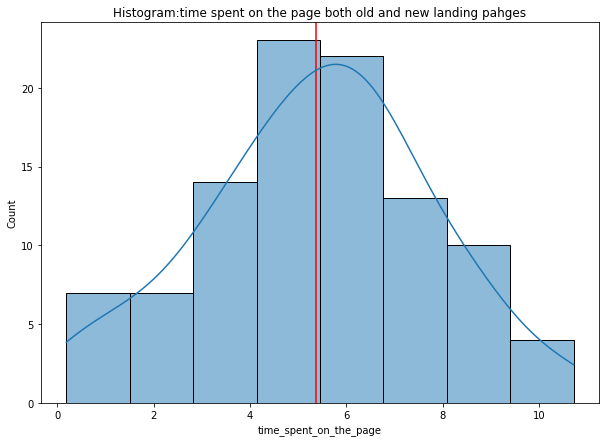

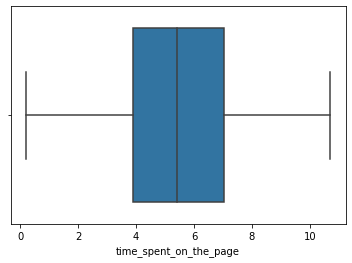

In [ ]:
# A univarate analysis on time_spent_on_the_page
plt.figure(figsize=(10,7))
plt.title('Histogram:time spent on the page both old and new landing pahges')
plt.axvline(ds['time_spent_on_the_page'].mean(), c = 'r')
sns.histplot(data=ds,x='time_spent_on_the_page',stat='count',kde=True);
plt.show()
sns.boxplot(data=ds,x='time_spent_on_the_page');
plt.show()

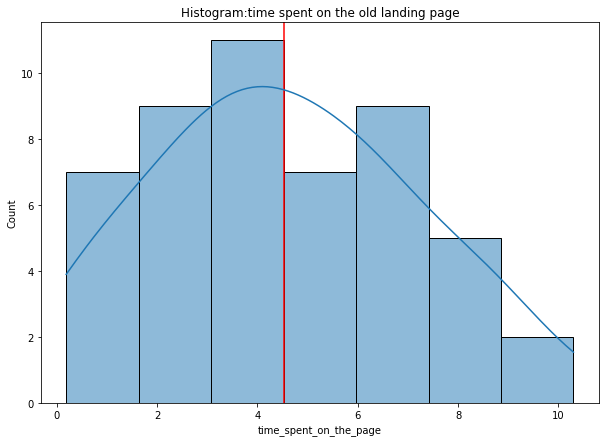

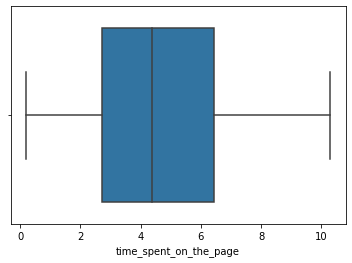

In [ ]:
# A univarate analysis on time spent on the old landing page
plt.figure(figsize=(10,7))
plt.title('Histogram:time spent on the old landing page')
plt.axvline(ds_old['time_spent_on_the_page'].mean(), c = 'r')
sns.histplot(data=ds_old,x='time_spent_on_the_page',stat='count',kde=True)
plt.show()
sns.boxplot(data=ds_old,x='time_spent_on_the_page')
plt.show()

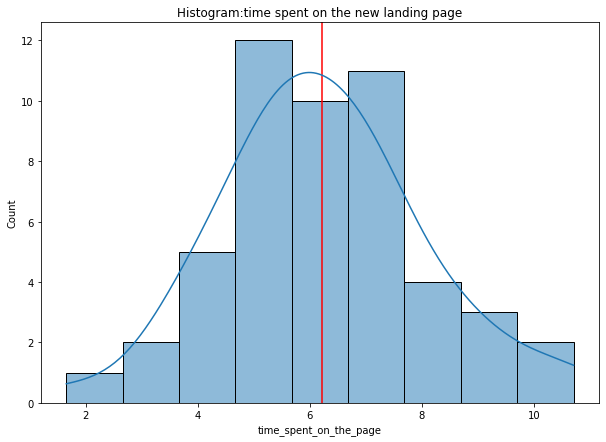

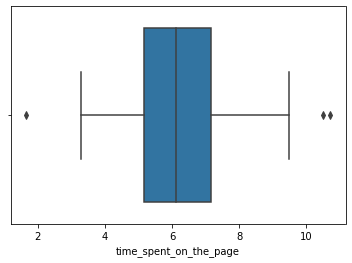

In [ ]:
# A univarate analysis on time spent on the new landing page
plt.figure(figsize=(10,7))
plt.title('Histogram:time spent on the new landing page')
plt.axvline(ds_new['time_spent_on_the_page'].mean(), c = 'r')
sns.histplot(data=ds_new,x='time_spent_on_the_page',stat='count',kde=True)
plt.show()
sns.boxplot(data=ds_new,x='time_spent_on_the_page')
plt.show()

### Observation:
* The kde(Kernel Density Estimator) shows that time spent on the new landing page follows a normal distribution, while time spent on the old page follows a somewhat right skewed didtribution.
* On average users spent more time on the new landing page compared to the old landing page.

### Bivariate Analysis

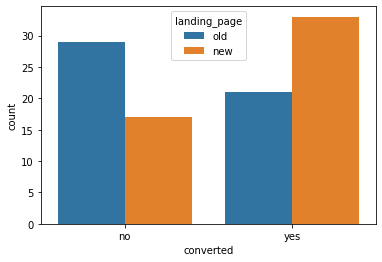

In [ ]:
# analyse conversion based on landing page
sns.countplot(x='converted', data=ds, hue='landing_page');

### Observation:
* The new landing page recorded higher conversion count(Whether the user gets converted to a subscriber of the news portal or not) than the old landing page.

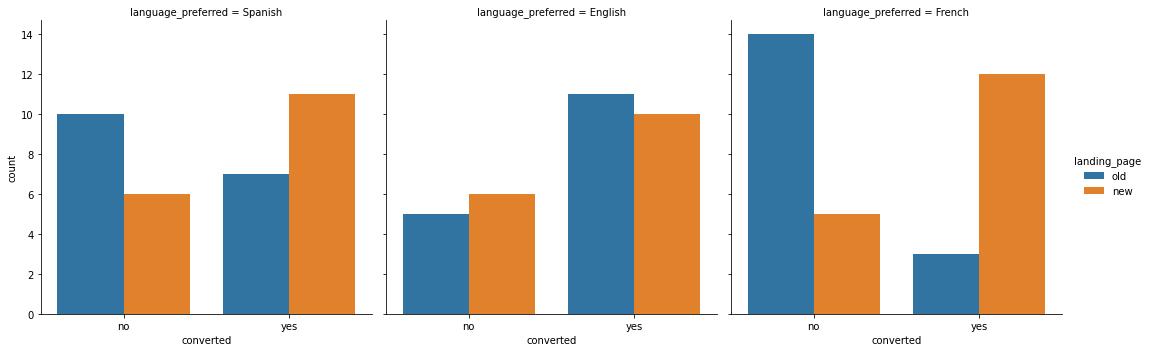

In [ ]:
sns.catplot(x='converted',col='language_preferred',data=ds, hue='landing_page',kind='count');

### Observation:
* Spanish and English languages recorded a higher amount of converts to those that didn't convert as opposed to French language, where more users didnt convert.


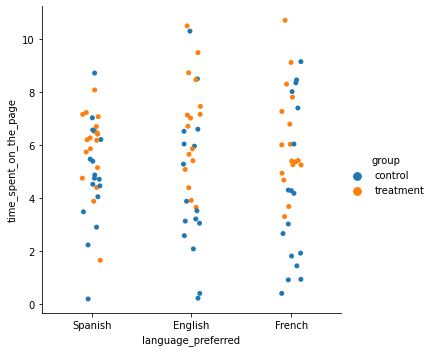

In [ ]:
sns.catplot(data = ds, x = 'language_preferred', hue='group',y='time_spent_on_the_page');

### Observation:
* those in treament group send longer times on the new landing page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

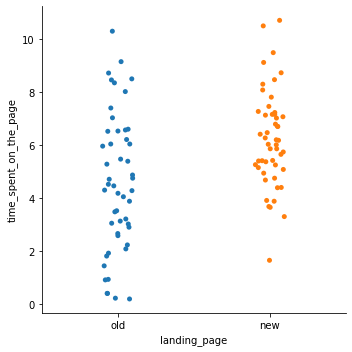

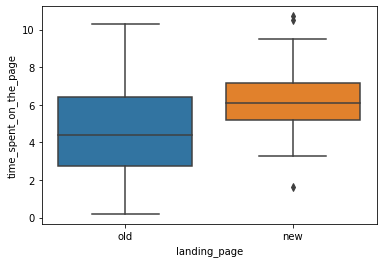

The mean time spent on the old landing page is  4.53 minutes.
The mean time spent on the new landing page is  6.22 minutes.


In [ ]:
sns.catplot(data = ds, x = 'landing_page',y='time_spent_on_the_page')
plt.show()
sns.boxplot(data = ds, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()
print('The mean time spent on the old landing page is ',str(round(ds_old['time_spent_on_the_page'].mean(),2)),'minutes.')
print('The mean time spent on the new landing page is ',str(round(ds_new['time_spent_on_the_page'].mean(),2)),'minutes.')

### Observation:
* The mean time spent on the old landing page at a glance is higher than the mean time spent on the new landing page by users.

### Step 1: Define the null and alternate hypotheses

* Let  μ1 = mean time spent on new landing page.

* let μ2 = mean time spent on old landing page.

let's define the null and alternate hypothesis
* H0: The mean time spent on the new landing page is equal to the mean time spent on the old landing page.
* Ha: The mean time spent on the new landing page is greater than the mean time spent on the old landing page.

Hence we test the null 
* H0:μ1=μ2 

against the alternate hypothesis

* Ha:μ1>μ2

from this we can conclude that this hypothesis is a one-tailed test with 2 sample means. so we will be using a two sample mean test.

### Step 2: Select Appropriate test

Let's analyse all our data to know the best type of test to use for our hypothesis testing.

* Continuous data - Yes, the time spent on the pages are measured on a continuous scale.

* Normally distributed populations -The sample size of 50 is greater than 30, hence Central Limit Theorem is applicable .

* Independent populations -The samples are taken from two different groups(control and treatment groups), hence we can assume that the populations are independent.

* Unequal population standard deviations -The sample standard deviations are different,  we can assume that the population standard deviations are different.
* Random sampling from the population - we are informed that the samples collected are randomly selected.

From the above confirmations, the most appropriate test to use is the Two Independent Sample T-test for Equality of Means - Unequal Std Dev.


### Step 3: Decide the significance level

* The given significance level(𝛂) is 5% (0.05)

### Step 4: Collect and prepare data

In [ ]:
print('μ1 = ',str(round(ds_old['time_spent_on_the_page'].mean(),2)),'minutes.')
print('μ2 = ',str(round(ds_new['time_spent_on_the_page'].mean(),2)),'minutes.')
print('std1 = ',str(round(ds_old['time_spent_on_the_page'].std(),2)),'minutes.')
print('std2 = ',str(round(ds_new['time_spent_on_the_page'].std(),2)),'minutes.')

μ1 =  4.53 minutes.
μ2 =  6.22 minutes.
std1 =  2.58 minutes.
std2 =  1.82 minutes.


### Step 5: Calculate the p-value

In [ ]:
# import the required function to compute the test statistic and p-value.
from scipy.stats import ttest_ind

In [ ]:
# For this test we will be using the p-value
test_stat, p_value = ttest_ind(ds_new['time_spent_on_the_page'],ds_old['time_spent_on_the_page'].dropna(),equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

* Using the significance level of 0.05; our p_value is less than the significance level, hence we reject the null hypothesis.
* We have enough evidence to prove that the mean time spent on the new landing page is greater than the mean time spent on the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

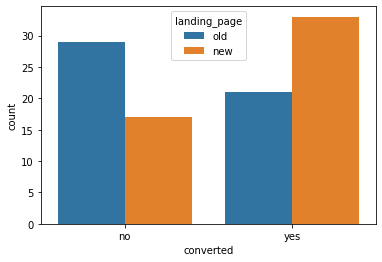

In [ ]:
sns.countplot(x='converted', data=ds, hue='landing_page');

### Observation:
* The new landing page recorded higher number numbers of converted users.

### Step 1: Define the null and alternate hypotheses

* Let p1 = conversion rate for  new landing page.

* let p2 = conversion rate for old landing page.

let's define the null and alternate hypothesis

* H0: The conversion rate for the new landing page is equal to the conversion rate for the old landing page.
* Ha: The conversion rate for the new landing page is greater than the conversion rate of the old landing page.
Hence we test the null

* H0:p1=p2

against the alternate hypothesis

* Ha:p1>p2
from this we can conclude that this hypothesis is a one-tailed test . 

### Step 2: Select Appropriate test

* The above hypotheses are concerned with proportions. We shall use a Proportions Z test to analyse the hypotheses and draw a conclusion for this problem.

### Step 3: Decide the significance level

* The given significance level(𝛂) is 5% (0.05)

### Step 4: Collect and prepare data

In [ ]:
# calculate the number of converts from new page 
new_converted = ds[ds['converted']=='yes'].landing_page.value_counts()['new']
#  calculate the number of converts from old page 
old_converted = ds[ds['converted']=='yes'].landing_page.value_counts()['old']

print('The number of new page converts is {0}'.format(new_converted))
print('The number of old page converts is {0} '.format(old_converted))

The number of new page converts is 33
The number of old page converts is 21 


In [ ]:
p1= round(new_converted/50,2)
p2= round(old_converted/50,2)
print(f'p1 and p2 are {p1} and {p2} respectively.')

p1 and p2 are 0.66 and 0.42 respectively.


### Observation:
from the above, the p1 seems to be greater than p2

### Step 5: Calculate the p-value

In [ ]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest
# calculate the p_value 
stat, p_value = proportions_ztest([new_converted, old_converted], [50, 50], alternative = 'larger')
# print the p-value
print('The p-value is '+ str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

* Using the significance level of 0.05; our p_value is less than the significance level, hence we reject the null hypothesis.
* We have enough evidence to prove that the conversion rate of the new landing page is greater than the conversion rate of the old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

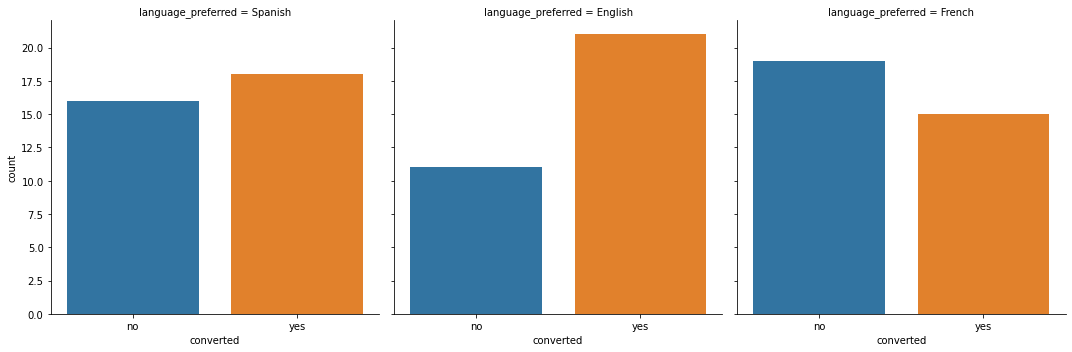

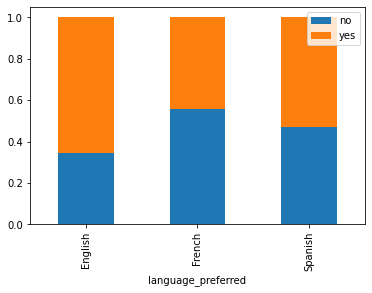

In [ ]:
sns.catplot(data = ds, x = 'converted', col = 'language_preferred', kind = 'count')
plt.show()
pd.crosstab(ds['language_preferred'],ds['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

### Observation:
* The abve graph doesn't seem to show any serious relationship between the conversion and preferred language.

### Define the null and alternate hypotheses


let's define the null and alternate hypothesis

* H0: conversion and language preferred are independent

against

* Ha: conversion and language preferred are not independent(they are related)

 

###  Select Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes (Test to check if 2 categorical variables are related or not).

Let's test whether the assumptions are satisfied or not
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


 #### Decide the significance level

* The given significance level(𝛂) is 5% (0.05)

### Collect and prepare data

In [ ]:
# create a contingency table 
cont_table = pd.crosstab(ds['converted'], ds['language_preferred'])
cont_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Calculate the p-value

In [ ]:
# impport the required function
from scipy.stats import chi2_contingency
# Calculate the p_value
chi2, p_value, dof, expected_frequency = chi2_contingency(cont_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


#### Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


###  Inference

* Using the significance level of 0.05; our p_value is greater than the significance level, hence we fail to reject the null hypothesis.
* We have enough evidence to support the claim  that conversion is independent of the language preferred.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

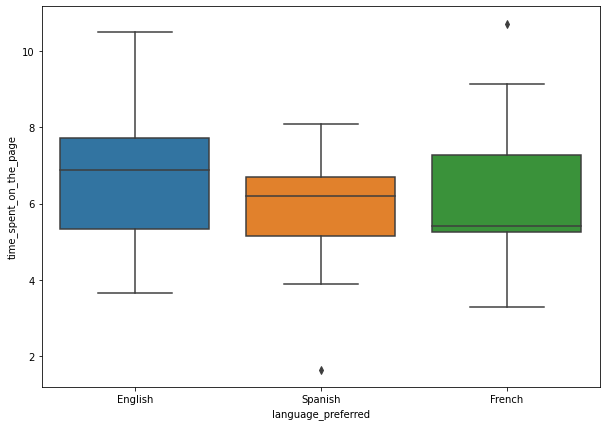

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot( data = ds_new,x='language_preferred', y='time_spent_on_the_page')
plt.show()

### Observation:
* The median time of the english and spanish languages are similar compared to that of french that seems to vary.

### Define the null and alternate hypotheses

Let's define the null and alternate hypothesis

* H0:The means of time spent on the new landing page with respect to each preferred language is equal


* Ha:At least one of the mean  time spent on the new landing page for each preffered language is different.

* let H0: μ1=μ2=μ3.

Hence we test,

* H0: μ1=μ2=μ3

against 

* Ha:At least one of the means of time spent on the new landing page for each preffered language is different.

This hypothesis concerns 3 population means


###  Select Appropriate test

One-way ANOVA test is to be used;
* The assumptions of normality and equality of variances need to be satisfied.

* For testing of normalty, Shapiro-Wilk’s test is applied to the response variable. 
* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the following null hypothesis

* H0: The time spent on the new landing page follow a normal distribution

against the alternative hypothesis

* Ha: The time spent on the new landing page  does not follow a normal distribution



In [ ]:
# Using the stat.shapiro() function to test for p_value
w, p_value = stats.shapiro(ds['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis that the response follows the normal distribution.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis that the response follows the normal distribution.')

Since the p-value 0.5643684267997742 is greater than the level of significance, we fail to reject the null hypothesis that the response follows the normal distribution.


#### Levene’s test

We will test the following null hypothesis

* H0: All the population variances are equal

against the alternative hypothesis

* Ha: At least one variance is different from the rest

In [ ]:
# Use the stats.levene() function to test for p_value
statistic, p_value = stats.levene(ds_new[ds_new['language_preferred']=='English']['time_spent_on_the_page'],
                            ds_new[ds_new['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            ds_new[ds_new['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis that the response follows the normal distribution.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis that the response follows the normal distribution.')

Since the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis that the response follows the normal distribution.


Since we failed to reject both hypothesis, our 2 assumptions are met. Hence we can use the ANOVA test.

 #### Decide the significance level

* The given significance level(𝛂) is 5% (0.05)


### Collect and prepare data

In [ ]:
# equate the time spent on  the new landing  page for each language to a variable
time_spent_english=ds_new[ds_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_french=ds_new[ds_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_spanish=ds_new[ds_new['language_preferred']=='Spanish']['time_spent_on_the_page']

### Calculate the p-value

In [ ]:
# import the required function
#using f_oneway() to carry out a one way ANOVA test
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(time_spent_english,time_spent_french,time_spent_french)
print('The p-value is ', p_value)

The p-value is  0.7331497764102441


#### Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis that the response follows the normal distribution.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis that the response follows the normal distribution.')

Since the p-value 0.7331497764102441 is greater than the level of significance, we fail to reject the null hypothesis that the response follows the normal distribution.


###  Inference

* Using the significance level of 0.05; our p_value is greater than the significance level, hence we fail to reject the null hypothesis.
* We don't have enough evidence to prove that at least one of the mean  time spent on the new landing page for each preffered language is different.

## Conclusion and Business Recommendations

### Conclusion:


### Recommendations:


___